# Multiple Linear Regression

**Step 0: Import packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

**Step 1: Load data**

In [2]:
dataset = pd.read_csv('data/50_Startups.csv')
dataset.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [4]:
# print(x)
# print(y)

**Step 2: Encoding**

In [5]:
# to encode categorical data ('State')
ct = ColumnTransformer([("encoding",OneHotEncoder(),[3])], remainder="passthrough")
x = ct.fit_transform(x)[:,1:] # to get rid of dummy

In [6]:
# print(x)

**Step 3: Split data**

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
# print(x_train)
# print(x_test)
# print(y_train)
# print(y_test)

**Step 4: Fit model**

In [9]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

**Step 5: Predict**

In [10]:
y_pred = reg.predict(x_test)

In [11]:
# print(y_pred)

**Step 6: Visualization**

It is impossible to visualize multiple linreg on a 2d plane.

Therefore, we directly plot the prediction results against the actual results to see how accurate our prediction is.

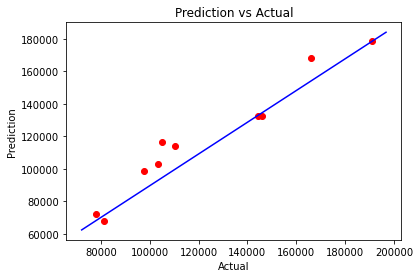

In [12]:
plt.scatter(y_test,y_pred,color='red')
plt.plot(plt.xlim(),plt.ylim(),color='blue')
plt.title("Prediction vs Actual")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show()

**Step 7: Find optimal model**

In [13]:
# some regressors may not be significant, so it is better to find out the most valuable regressors.
x = sm.add_constant(x)
x = np.array(x,dtype=float)

In [14]:
reg_ols = sm.OLS(y,x).fit()
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           1.34e-27
Time:                        21:59:43   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As shown in the P-value column, the only significant regressor is actually x3, which is "R&D Speed".

In [15]:
reg_OLS = sm.OLS(y,x[:,[0,3]]).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           3.50e-32
Time:                        21:59:43   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

However, in many cases, it is better to filter out the optimal regressors through **backward elimination**, where we delete the regressor with the highest p-value and run OLS again and continue the cycle until reaching a satisfactory outcome.

In [16]:
# reg_OLS = sm.OLS(y,x[:,[0,1,3,4,5]]).fit()
# reg_OLS.summary()
# reg_OLS = sm.OLS(y,x[:,[0,3,4,5]]).fit()
# reg_OLS.summary()
# reg_OLS = sm.OLS(y,x[:,[0,3,5]]).fit()
# reg_OLS.summary()
# reg_OLS = sm.OLS(y,x[:,[0,3]]).fit()
# reg_OLS.summary()

**Step 8: Evaluation**

In [17]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
x_train = scx.fit_transform(x_train)
scy = StandardScaler()
y_train = scy.fit_transform(y_train.reshape(-1,1))

# RUN AFTER FEATURE SCALING ONLY
mse = cross_val_score(reg,x_train,y_train,scoring='neg_mean_squared_error')
print(np.mean(mse))

mse2 = cross_val_score(reg,x_train[:,2].reshape(-1,1),y_train,scoring='neg_mean_squared_error')
print(np.mean(mse2))

-0.08784633307789841
-0.06290233665912284


As shown above, the MSE for the regression based only on "R&D Speed" is a little bit better than the MSE for the multiple linreg in this case.

Through Backward Elimination, we can eliminate the unnecessary regressors and acquire a much better outcome. 